Measuring the tendency of CNNs to Learn Surface Statistical Regularities

Jason Jo, Yoshua Bengio
(Submitted on 30 Nov 2017)

https://arxiv.org/abs/1711.11561

In [1]:
# coding: utf-8
from __future__ import print_function,division,absolute_import

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
image = plt.imread('image2.jpg')#, flatten=True)     # flatten=True gives a greyscale image
image = image[:,:,1]
np.min(image), np.max(image)

(0, 255)

In [6]:
image = image / 255.0
np.min(image), np.max(image)

(0.0, 1.0)

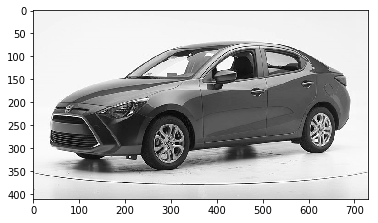

In [7]:
plt.figure()
plt.imshow(image,cmap='gray')
plt.show()

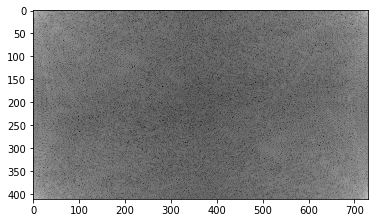

In [8]:
# fft2 = fftpack.fft2(image)
fft2 = np.fft.fft2(image)

plt.figure()
plt.imshow(np.log10(np.abs(fft2)),cmap='gray')
plt.show()

In [9]:
np.min(fft2), np.max(fft2)

((-20030.850527146016-5692.515791063226j),
 (203665.08627450973+2.1600499167107046e-12j))

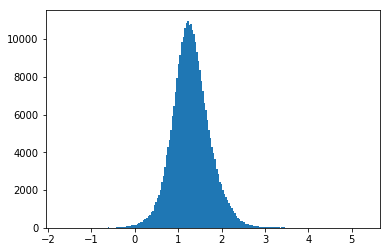

In [10]:
data = np.reshape(np.log10(np.abs(fft2)),[-1])

plt.figure()
plt.hist(data,bins=200)
plt.show()

In [12]:
ndef func(bw):
    
    fft2 = np.fft.fft2(image)
    h, w = fft2.shape
    # print(('h',h,'w',w,'bw',bw),file=sys.stderr)
    
    fft2[bw:h-bw,bw:w-bw] = 1e-9
    image2 = np.fft.ifft2(fft2)

    fig = plt.figure(figsize=[6.5,9.5])

    ax1 = fig.add_subplot(211) # , projection='3d')
    ax1.imshow(np.log10(np.abs(fft2)),cmap='gray')

    ax2 = fig.add_subplot(212) # , projection='3d')
    ax2.imshow(np.abs(image2),cmap='gray')

    plt.show()

interactive(children=(IntSlider(value=11, description='bw', max=220, min=11), Output()), _dom_classes=('widget…